In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_bid_ask = pd.read_csv('AAPL_1101_cqm.csv')
data_trade_price  = pd.read_csv('AAPL1101.csv')
data_bid_ask, data_trade_price

(          Unnamed: 0        date           time_m  time_m_nano ex sym_root  \
 0                  0  2023-11-01  03:59:00.038466           75  K     AAPL   
 1                  1  2023-11-01  03:59:00.141173          335  Z     AAPL   
 2                  2  2023-11-01  04:00:00.003476          914  K     AAPL   
 3                  3  2023-11-01  04:00:00.003494          241  K     AAPL   
 4                  4  2023-11-01  04:00:00.003618          577  K     AAPL   
 ...              ...         ...              ...          ... ..      ...   
 14279737      279737  2023-11-01  19:59:35.731235          518  P     AAPL   
 14279738      279738  2023-11-01  19:59:36.180618          160  P     AAPL   
 14279739      279739  2023-11-01  19:59:55.148197          746  P     AAPL   
 14279740      279740  2023-11-01  19:59:55.906877          701  K     AAPL   
 14279741      279741  2023-11-01  19:59:58.157209          160  P     AAPL   
 
           sym_suffix     bid  bidsiz     ask  ...

In [3]:
# Preprocessing the trade price data - Keeping 'date', 'time_m', 'size', and 'price'
columns_to_keep_trade_price = ['date', 'time_m', 'size', 'price']
data_trade_price = data_trade_price[columns_to_keep_trade_price]
data_trade_price['datetime'] = pd.to_datetime(data_trade_price['date'].astype(str) + ' ' + data_trade_price['time_m'].astype(str))
data_trade_price = data_trade_price.drop(columns=['date', 'time_m'])
data_trade_price.set_index('datetime', inplace=True)

# Preprocessing the bid-ask data - Keeping 'date', 'time_m', 'bid', 'bidsiz', 'ask', 'asksiz'
columns_to_keep_bid_ask = ['date', 'time_m', 'bid', 'bidsiz', 'ask', 'asksiz']
data_bid_ask = data_bid_ask[columns_to_keep_bid_ask]
data_bid_ask['datetime'] = pd.to_datetime(data_bid_ask['date'].astype(str) + ' ' + data_bid_ask['time_m'].astype(str))
data_bid_ask = data_bid_ask.drop(columns=['date', 'time_m'])
data_bid_ask.set_index('datetime', inplace=True)

# Check for missing values in both datasets
missing_values_trade_price = data_trade_price.isnull().sum()
missing_values_bid_ask = data_bid_ask.isnull().sum()

missing_values_trade_price, missing_values_bid_ask

(size     0
 price    0
 dtype: int64,
 bid       0
 bidsiz    0
 ask       0
 asksiz    0
 dtype: int64)

In [4]:
data_trade_price

,size,price
datetime,,
2023-11-01 04:00:00.005289,10,170.490
2023-11-01 04:00:00.010506,21,170.490
2023-11-01 04:00:00.011020,2,170.390
2023-11-01 04:00:00.032011,14,170.600
2023-11-01 04:00:00.220107,7,170.390
...,...,...
2023-11-01 19:59:50.138527,1,174.795
2023-11-01 19:59:51.320697,7,174.740
2023-11-01 19:59:51.484432,1,174.795


In [5]:
data_bid_ask

,bid,bidsiz,ask,asksiz
datetime,,,,
2023-11-01 03:59:00.038466,0.00,0,0.00,0
2023-11-01 03:59:00.141173,0.00,0,0.00,0
2023-11-01 04:00:00.003476,0.00,0,171.48,4
2023-11-01 04:00:00.003494,169.02,4,171.48,4
2023-11-01 04:00:00.003618,169.02,4,171.48,4
...,...,...,...,...
2023-11-01 19:59:35.731235,174.70,1,174.80,1
2023-11-01 19:59:36.180618,174.70,1,174.85,1
2023-11-01 19:59:55.148197,174.70,1,174.90,2


In [6]:
# Replacing 0 and 0.00 with NaN
data_bid_ask.replace({0: np.nan, 0.00: np.nan}, inplace=True)

# Dropping rows with any NaN values
data_bid_ask = data_bid_ask.dropna()

# Display the cleaned DataFrame
data_bid_ask

,bid,bidsiz,ask,asksiz
datetime,,,,
2023-11-01 04:00:00.003494,169.02,4.0,171.48,4.0
2023-11-01 04:00:00.003618,169.02,4.0,171.48,4.0
2023-11-01 04:00:00.003936,169.02,4.0,171.48,4.0
2023-11-01 04:00:00.004356,169.02,4.0,171.30,1.0
2023-11-01 04:00:00.004810,169.02,4.0,171.30,1.0
...,...,...,...,...
2023-11-01 19:59:35.731235,174.70,1.0,174.80,1.0
2023-11-01 19:59:36.180618,174.70,1.0,174.85,1.0
2023-11-01 19:59:55.148197,174.70,1.0,174.90,2.0


In [7]:
# bid_ask_test = data_bid_ask.between_time('09:30', '16:00')

# bid_ask_test.to_csv('bid_ask_data.csv')

# bid_ask_test

In [8]:
# Check the alignment of time intervals in both datasets
time_intervals_trade_price = data_trade_price.index.to_series().diff().dropna().unique()
time_intervals_bid_ask = data_bid_ask.index.to_series().diff().dropna().unique()

# Displaying the unique time intervals for both datasets
time_intervals_trade_price, time_intervals_bid_ask

(array([   5217000,     514000,   20991000, ...,  163735000,  711967000,
        3710475000], dtype='timedelta64[ns]'),
 array([     124000,      318000,      420000, ..., 18967579000,
          758680000,  2250332000], dtype='timedelta64[ns]'))

In [9]:
# Adjusting the aggregation rules for each dataset separately

# Aggregation rules for trade price data
aggregation_rules_trade_price = {
    'size': 'sum',  # Sum of size
    'price': 'mean' # Average price
}

# Aggregation rules for bid-ask data
aggregation_rules_bid_ask = {
    'bid': 'mean',    # Average bid
    'ask': 'mean',    # Average ask
    'bidsiz': 'sum',  # Sum of bidsiz
    'asksiz': 'sum'   # Sum of asksiz
}

# Applying the aggregation rules during resampling for each dataset
data_trade_price_resampled_modified = data_trade_price.resample('1S').agg(aggregation_rules_trade_price).ffill()
data_bid_ask_resampled_modified = data_bid_ask.resample('1S').agg(aggregation_rules_bid_ask).ffill()

# Merging the modified resampled datasets
combined_data_modified = pd.merge(data_trade_price_resampled_modified, data_bid_ask_resampled_modified, 
                                  left_index=True, right_index=True, how='outer')

# Display the first few rows of the modified combined dataset
combined_data_modified

,size,price,bid,ask,bidsiz,asksiz
datetime,,,,,,
2023-11-01 04:00:00,63.0,170.507500,168.838889,171.236667,100.0,93.0
2023-11-01 04:00:01,8.0,170.572000,168.308000,175.680000,15.0,17.0
2023-11-01 04:00:02,13.0,170.390000,167.155000,175.925000,4.0,5.0
2023-11-01 04:00:03,5.0,170.516667,169.155000,170.842500,10.0,13.0
2023-11-01 04:00:04,0.0,170.516667,168.225000,174.225000,12.0,21.0
...,...,...,...,...,...,...
2023-11-01 19:59:54,0.0,174.795000,174.700000,174.850000,0.0,0.0
2023-11-01 19:59:55,75.0,174.740000,174.720000,174.950000,13.0,5.0
2023-11-01 19:59:56,NaN,NaN,174.720000,174.950000,0.0,0.0


In [10]:
# Filtering the data to keep only rows between 9:30 AM to 4:00 PM
filtered_data = combined_data_modified.between_time('09:30', '16:00')

# Display the first few rows of the filtered dataframe
filtered_data

,size,price,bid,ask,bidsiz,asksiz
datetime,,,,,,
2023-11-01 09:30:00,675717.0,170.991579,170.505649,171.212176,1536.0,9794.0
2023-11-01 09:30:01,17289.0,170.996759,170.678320,171.207797,3797.0,7195.0
2023-11-01 09:30:02,34371.0,170.987080,170.769932,171.049971,4424.0,2543.0
2023-11-01 09:30:03,11982.0,170.977349,170.655623,171.010122,723.0,765.0
2023-11-01 09:30:04,42883.0,171.045717,170.799189,171.427608,2609.0,5893.0
...,...,...,...,...,...,...
2023-11-01 15:59:56,10311.0,173.987814,173.696581,174.219897,1107.0,2182.0
2023-11-01 15:59:57,14294.0,173.954605,173.746531,174.191267,2910.0,2866.0
2023-11-01 15:59:58,22259.0,173.941374,173.709171,174.166648,7956.0,3157.0


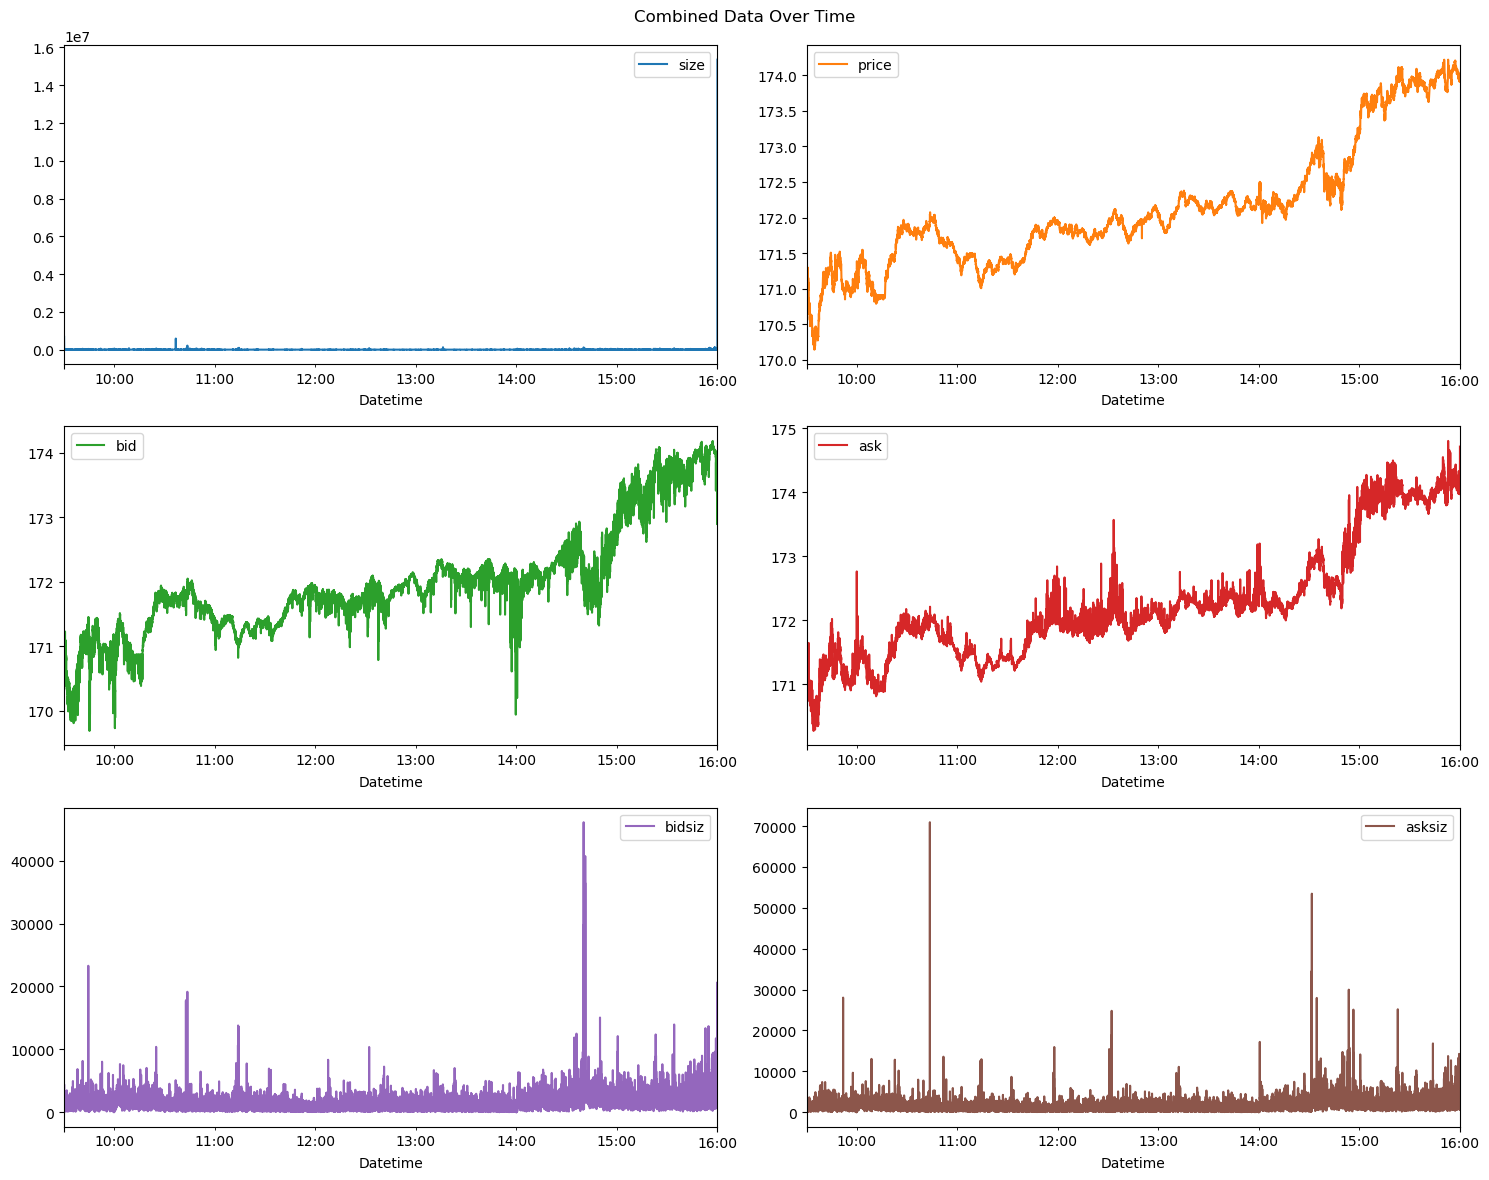

In [11]:
# Plotting the entire combined_data_modified dataframe with datetime on x-axis for all graphs
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12)) #sharex = true to use same X
filtered_data.plot(kind='line', subplots=True, layout=(3, 2), ax=axes, title='Combined Data Over Time')

# Setting labels for the x-axis
for ax in axes.flat:
    ax.set_xlabel('Datetime')

# Displaying the plot
plt.tight_layout()
plt.show()

# SHOWCASE

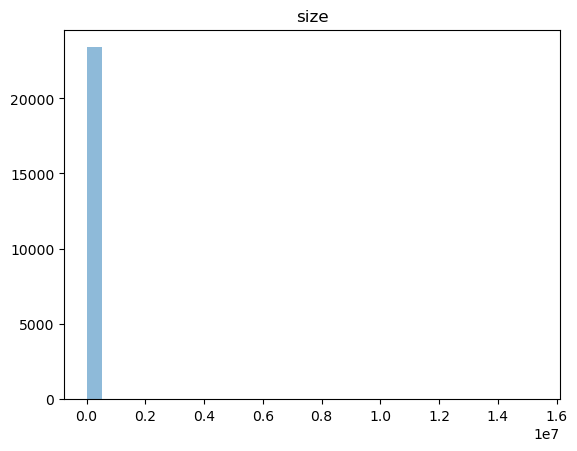

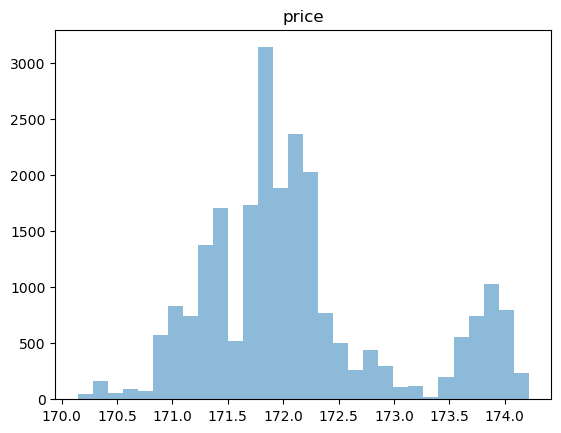

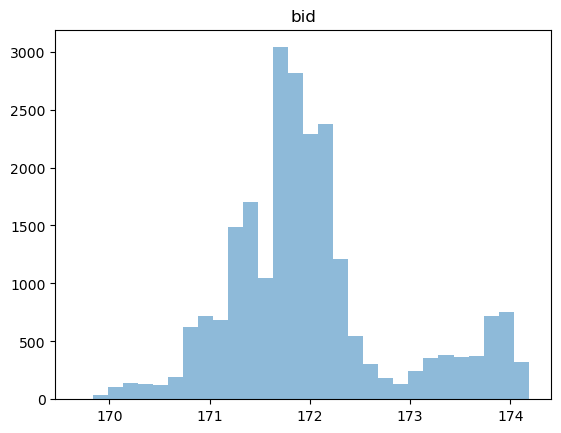

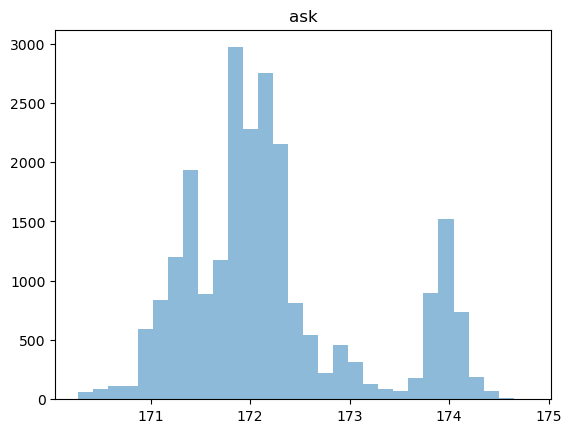

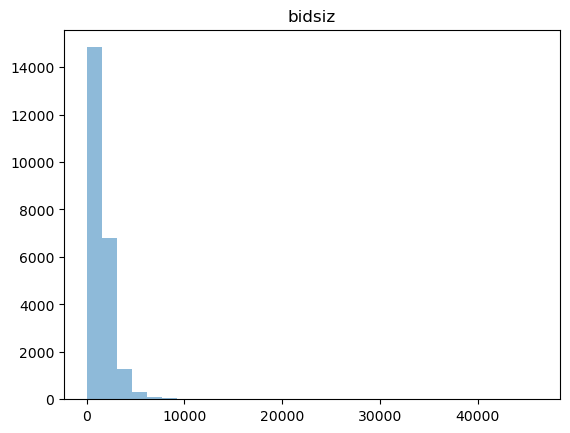

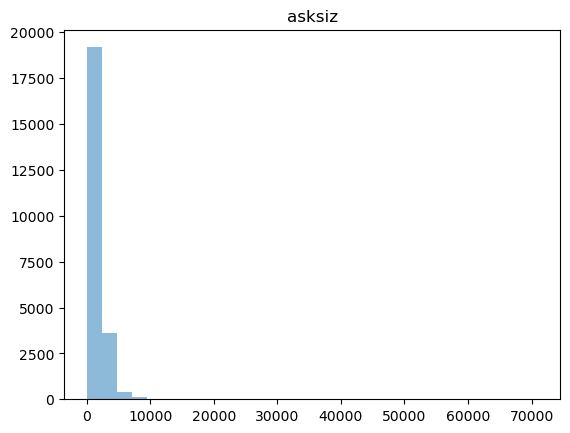

In [12]:
import scipy.stats as stats

# Assuming filtered_data is your DataFrame
for column in filtered_data.columns:
    plt.hist(filtered_data[column], bins=30, alpha=0.5)
    plt.title(column)
    plt.show()

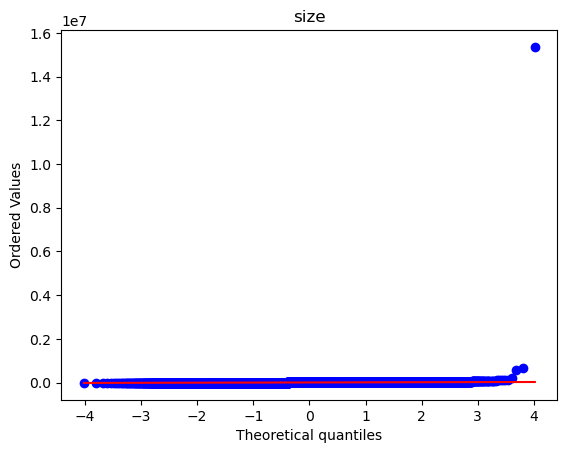

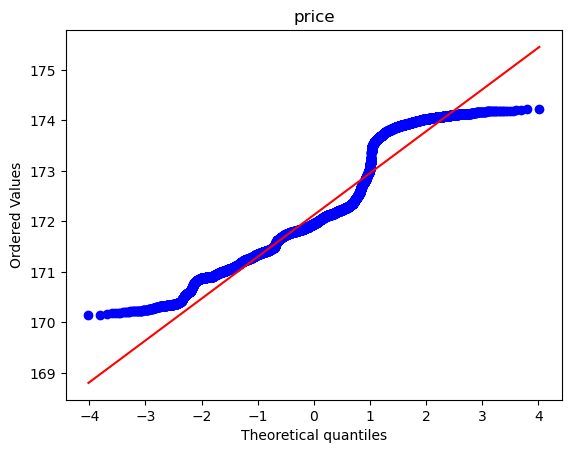

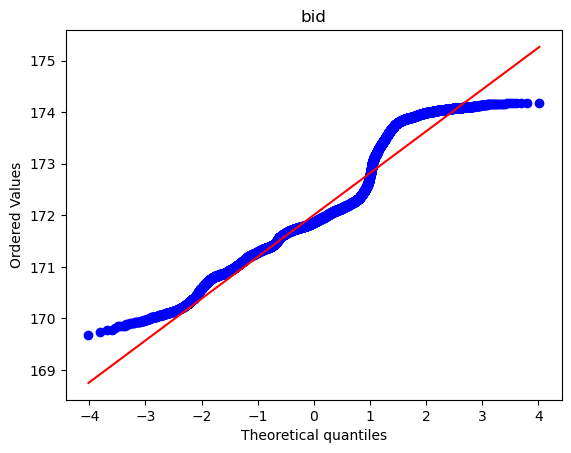

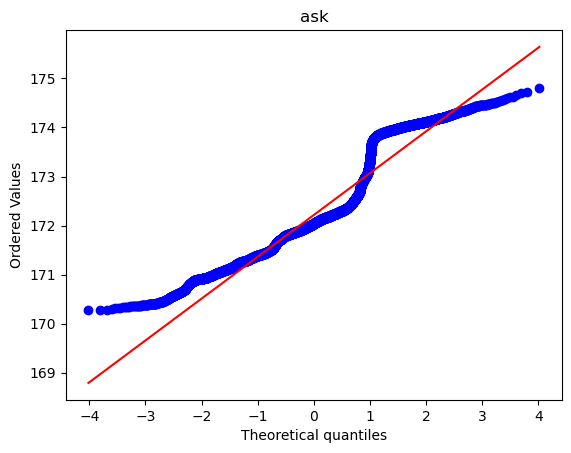

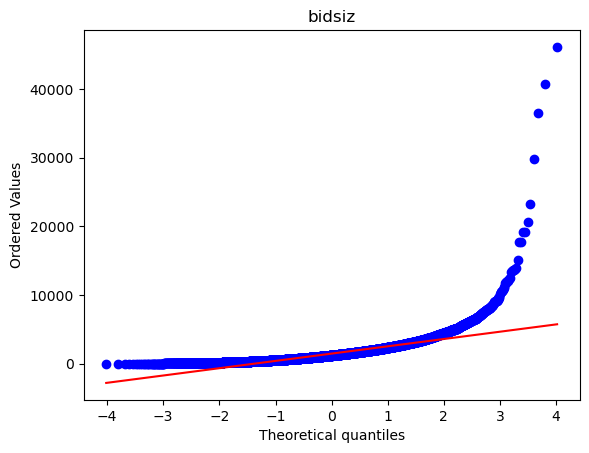

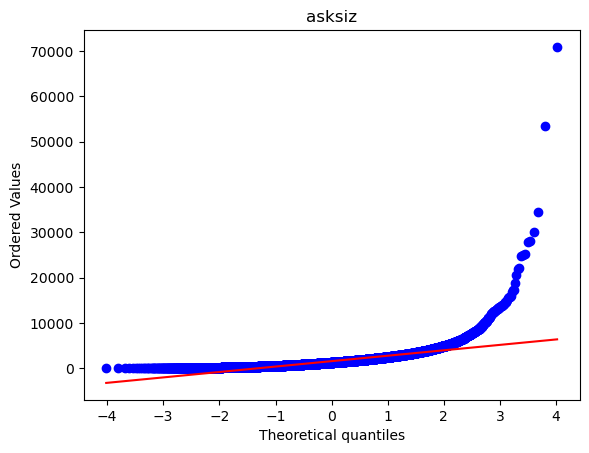

In [13]:
for column in filtered_data.columns:
    stats.probplot(filtered_data[column], dist="norm", plot=plt)
    plt.title(column)
    plt.show()

In [14]:
for column in filtered_data.columns:
    stat, p = stats.shapiro(filtered_data[column])
    print(f'{column}: Statistics={stat}, p-value={p}')
    # Interpret the p-value
    alpha = 0.05
    if p > alpha:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

size: Statistics=0.0029774904251098633, p-value=0.0
size does not look Gaussian (reject H0)
price: Statistics=0.911055862903595, p-value=0.0
price does not look Gaussian (reject H0)
bid: Statistics=0.9238260388374329, p-value=0.0
bid does not look Gaussian (reject H0)
ask: Statistics=0.9040734767913818, p-value=0.0
ask does not look Gaussian (reject H0)
bidsiz: Statistics=0.7036221027374268, p-value=0.0
bidsiz does not look Gaussian (reject H0)
asksiz: Statistics=0.6234334111213684, p-value=0.0
asksiz does not look Gaussian (reject H0)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23401 entries, 2023-11-01 09:30:00 to 2023-11-01 16:00:00
Freq: S
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    23401 non-null  float64
 1   price   23401 non-null  float64
 2   bid     23401 non-null  float64
 3   ask     23401 non-null  float64
 4   bidsiz  23401 non-null  float64
 5   asksiz  23401 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB
None
               size         price           bid           ask        bidsiz  \
count  2.340100e+04  23401.000000  23401.000000  23401.000000  23401.000000   
mean   2.656500e+03    172.127303    172.006853    172.216731   1473.314559   
std    1.006246e+05      0.867807      0.844207      0.896904   1267.104297   
min    0.000000e+00    170.145092    169.685691    170.268410      1.000000   
25%    3.540000e+02    171.576000    171.468378    171.629498    698.000000   
50%    9.530000e+02    171.952333 

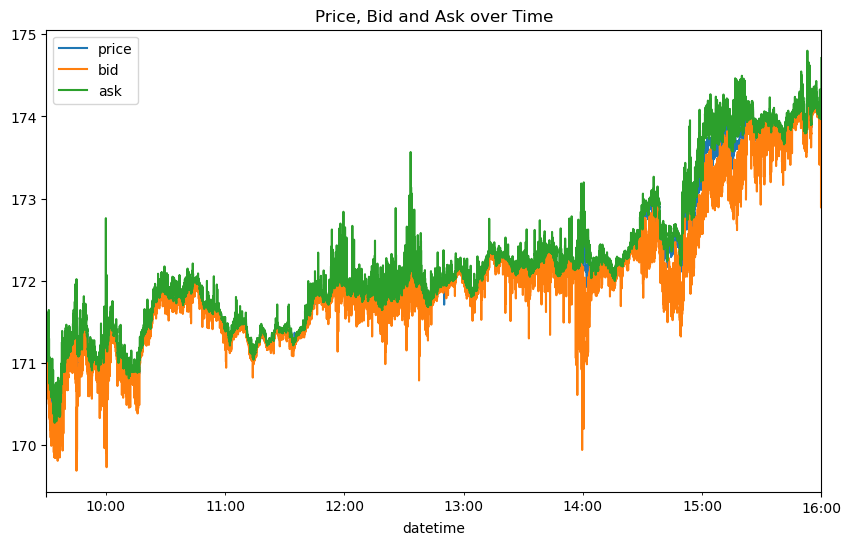

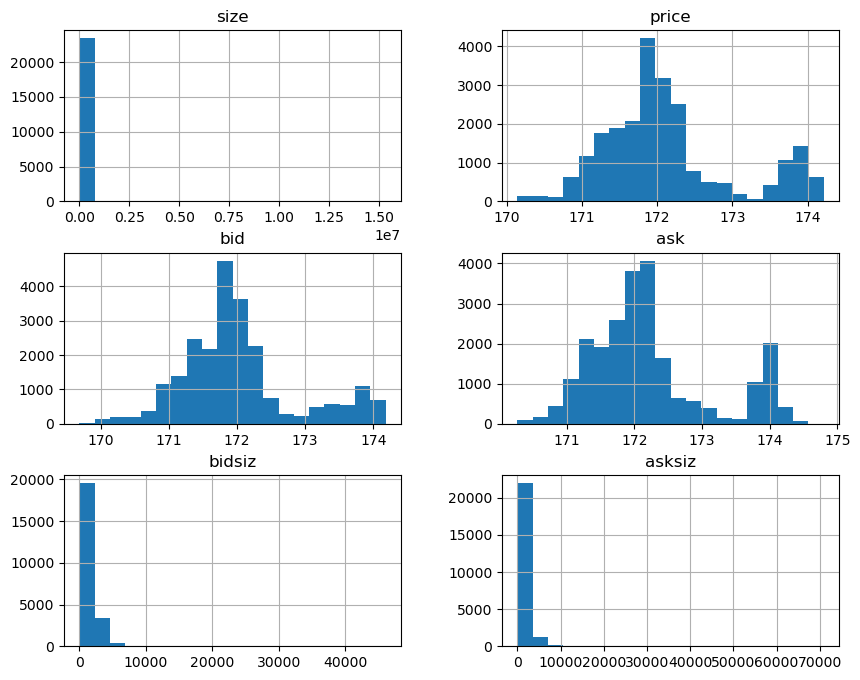

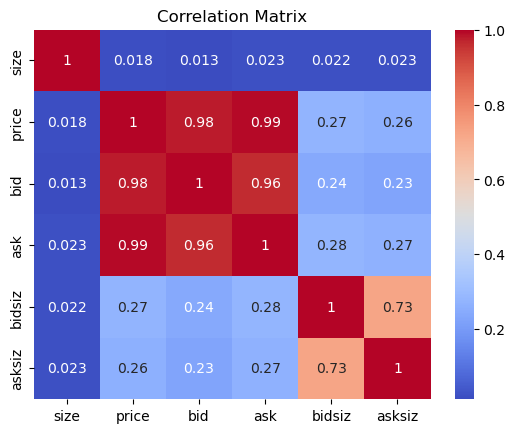

In [15]:
# Load your data into 'filtered_data'
# filtered_data = pd.read_csv('your_data.csv')
# Make sure 'datetime' is the index
filtered_data.index = pd.to_datetime(filtered_data.index)

# Basic Overview
print(filtered_data.info())
print(filtered_data.describe())

# Missing Values
print(filtered_data.isnull().sum())

# Time Series Plot
filtered_data[['price', 'bid', 'ask']].plot(figsize=(10, 6))
plt.title('Price, Bid and Ask over Time')
plt.show()

# Histograms
filtered_data.hist(figsize=(10, 8), bins=20)
plt.show()

# Correlation Matrix
corr_matrix = filtered_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
filtered_data.describe()

,size,price,bid,ask,bidsiz,asksiz
count,2.340100e+04,23401.000000,23401.000000,23401.000000,23401.000000,23401.000000
mean,2.656500e+03,172.127303,172.006853,172.216731,1473.314559,1592.595573
std,1.006246e+05,0.867807,0.844207,0.896904,1267.104297,1516.926308
min,0.000000e+00,170.145092,169.685691,170.268410,1.000000,1.000000
25%,3.540000e+02,171.576000,171.468378,171.629498,698.000000,740.000000
50%,9.530000e+02,171.952333,171.862232,172.040543,1209.000000,1283.000000
75%,2.130000e+03,172.340295,172.237185,172.443684,1912.000000,2032.000000
max,1.535447e+07,174.216371,174.182162,174.800607,46101.000000,70935.000000


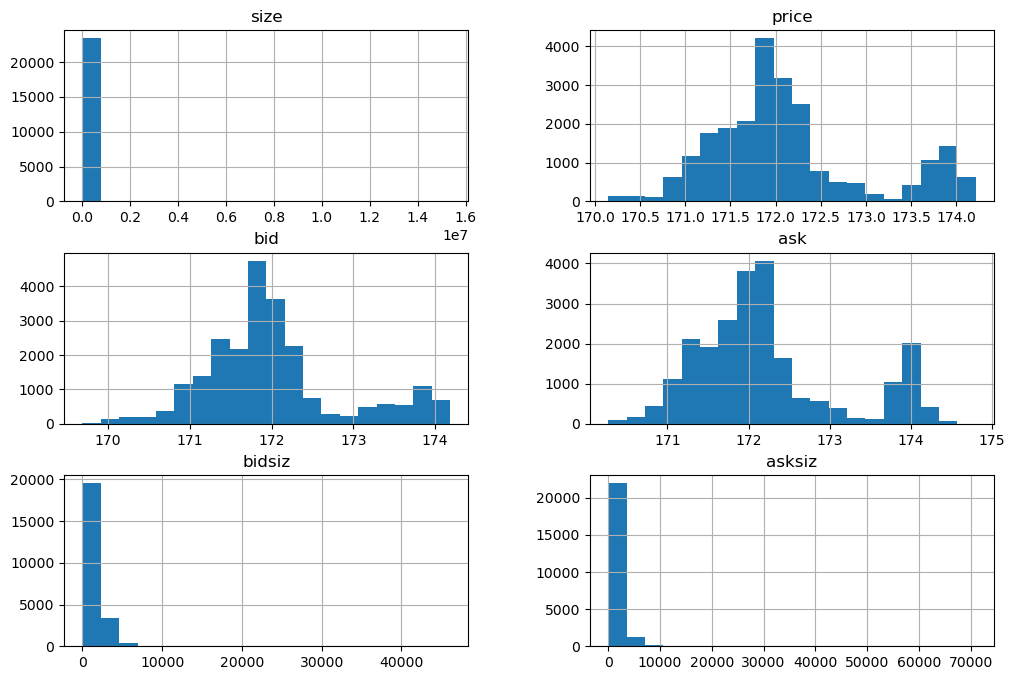

In [17]:
filtered_data.hist(figsize=(12, 8), bins=20)
plt.show()

In [18]:
skewness = filtered_data.skew()
kurtosis = filtered_data.kurtosis()
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 size      151.793180
price       0.807472
bid         0.775696
ask         0.838861
bidsiz      7.033878
asksiz      9.778884
dtype: float64

Kurtosis:
 size      23156.048855
price         0.033661
bid           0.446849
ask          -0.057809
bidsiz      159.161242
asksiz      288.864519
dtype: float64


In [19]:
filtered_data.to_csv('filtered_data.csv')

# END

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
cols_to_standardize = ['size', 'bidsiz', 'asksiz']
filtered_data[cols_to_standardize] = standard_scaler.fit_transform(filtered_data[cols_to_standardize])

In [21]:
minmax_scaler = MinMaxScaler()
cols_to_normalize = ['price', 'bid', 'ask']
filtered_data[cols_to_normalize] = minmax_scaler.fit_transform(filtered_data[cols_to_normalize])

In [22]:
filtered_data

,size,price,bid,ask,bidsiz,asksiz
datetime,,,,,,
2023-11-01 09:30:00,6.688972,0.207917,0.182356,0.208236,0.049472,5.406709
2023-11-01 09:30:01,0.145420,0.209189,0.220757,0.207270,1.833894,3.693340
2023-11-01 09:30:02,0.315183,0.206812,0.241132,0.172446,2.328734,0.626546
2023-11-01 09:30:03,0.092678,0.204422,0.215710,0.163654,-0.592162,-0.545586
2023-11-01 09:30:04,0.399777,0.221214,0.247638,0.255769,0.896303,2.835007
...,...,...,...,...,...,...
2023-11-01 15:59:56,0.076072,0.943861,0.892008,0.871870,-0.289102,0.388560
2023-11-01 15:59:57,0.115655,0.935704,0.903117,0.865553,1.133858,0.839482
2023-11-01 15:59:58,0.194812,0.932455,0.894809,0.860121,5.116251,1.031321


In [23]:
# Adding time-based features
filtered_data['hour'] = filtered_data.index.hour
filtered_data['minute'] = filtered_data.index.minute

# Adding derived statistical features
# Bid-Ask Spread
filtered_data['spread'] = filtered_data['ask'] - filtered_data['bid']

# # Moving Averages - Short-term (5 minutes) and Long-term (30 minutes)
# filtered_data['ma_5'] = filtered_data['price'].rolling(window=5).mean()
# filtered_data['ma_10'] = filtered_data['price'].rolling(window=10).mean()

# Volatility - Standard deviation of prices over a 30 minute window
filtered_data['volatility_5'] = filtered_data['price'].rolling(window=5).std()
filtered_data['volatility_10'] = filtered_data['price'].rolling(window=10).std()

# Volume Imbalance
filtered_data['volume_imbalance'] = filtered_data['bidsiz'] - filtered_data['asksiz']

# # Adding historical price features - Lagged Prices
# filtered_data['lag_price_1'] = filtered_data['price'].shift(1) # 1-minute lag
# filtered_data['lag_price_3'] = filtered_data['price'].shift(3) # 3-minute lag

# Adding historical volume features - Lagged Volume
filtered_data['prev_volume_1'] = filtered_data['size'].shift(1)
filtered_data['prev_volume_3'] = filtered_data['size'].shift(3)

# Display the first few rows of the dataset with new features
filtered_data

,size,price,bid,ask,bidsiz,asksiz,hour,minute,spread,volatility_5,volatility_10,volume_imbalance,prev_volume_1,prev_volume_3
datetime,,,,,,,,,,,,,,
2023-11-01 09:30:00,6.688972,0.207917,0.182356,0.208236,0.049472,5.406709,9,30,0.025880,NaN,NaN,-5.357237,NaN,NaN
2023-11-01 09:30:01,0.145420,0.209189,0.220757,0.207270,1.833894,3.693340,9,30,-0.013488,NaN,NaN,-1.859446,6.688972,NaN
2023-11-01 09:30:02,0.315183,0.206812,0.241132,0.172446,2.328734,0.626546,9,30,-0.068685,NaN,NaN,1.702187,0.145420,NaN
2023-11-01 09:30:03,0.092678,0.204422,0.215710,0.163654,-0.592162,-0.545586,9,30,-0.052056,NaN,NaN,-0.046576,0.315183,6.688972
2023-11-01 09:30:04,0.399777,0.221214,0.247638,0.255769,0.896303,2.835007,9,30,0.008131,0.006557,NaN,-1.938703,0.092678,0.145420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01 15:59:56,0.076072,0.943861,0.892008,0.871870,-0.289102,0.388560,15,59,-0.020138,0.005371,0.007562,-0.677662,0.059197,0.025039
2023-11-01 15:59:57,0.115655,0.935704,0.903117,0.865553,1.133858,0.839482,15,59,-0.037564,0.003086,0.007506,0.294376,0.076072,0.060797
2023-11-01 15:59:58,0.194812,0.932455,0.894809,0.860121,5.116251,1.031321,15,59,-0.034687,0.004838,0.007368,4.084930,0.115655,0.059197


In [24]:
filtered_data.dropna(inplace=True)
filtered_data

,size,price,bid,ask,bidsiz,asksiz,hour,minute,spread,volatility_5,volatility_10,volume_imbalance,prev_volume_1,prev_volume_3
datetime,,,,,,,,,,,,,,
2023-11-01 09:30:09,0.095014,0.210982,0.251202,0.197001,0.028953,-0.018192,9,30,-0.054201,0.007344,0.007709,0.047145,0.003960,0.048583
2023-11-01 09:30:10,0.046376,0.188374,0.205737,0.195635,-0.156513,-0.231127,9,30,-0.010102,0.012285,0.011087,0.074614,0.095014,0.034947
2023-11-01 09:30:11,0.013183,0.208764,0.248359,0.226188,-0.548755,-0.491528,9,30,-0.022172,0.011748,0.011099,-0.057227,0.046376,0.003960
2023-11-01 09:30:12,0.026103,0.223915,0.237387,0.266374,-0.510083,-0.439448,9,30,0.028988,0.012853,0.011562,-0.070635,0.013183,0.095014
2023-11-01 09:30:13,-0.010440,0.236356,0.195066,0.297413,-0.589005,-0.493506,9,30,0.102347,0.017964,0.013097,-0.095499,0.026103,0.046376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01 15:59:56,0.076072,0.943861,0.892008,0.871870,-0.289102,0.388560,15,59,-0.020138,0.005371,0.007562,-0.677662,0.059197,0.025039
2023-11-01 15:59:57,0.115655,0.935704,0.903117,0.865553,1.133858,0.839482,15,59,-0.037564,0.003086,0.007506,0.294376,0.076072,0.060797
2023-11-01 15:59:58,0.194812,0.932455,0.894809,0.860121,5.116251,1.031321,15,59,-0.034687,0.004838,0.007368,4.084930,0.115655,0.059197


Average MSE across all folds: 0.00042789957215338845


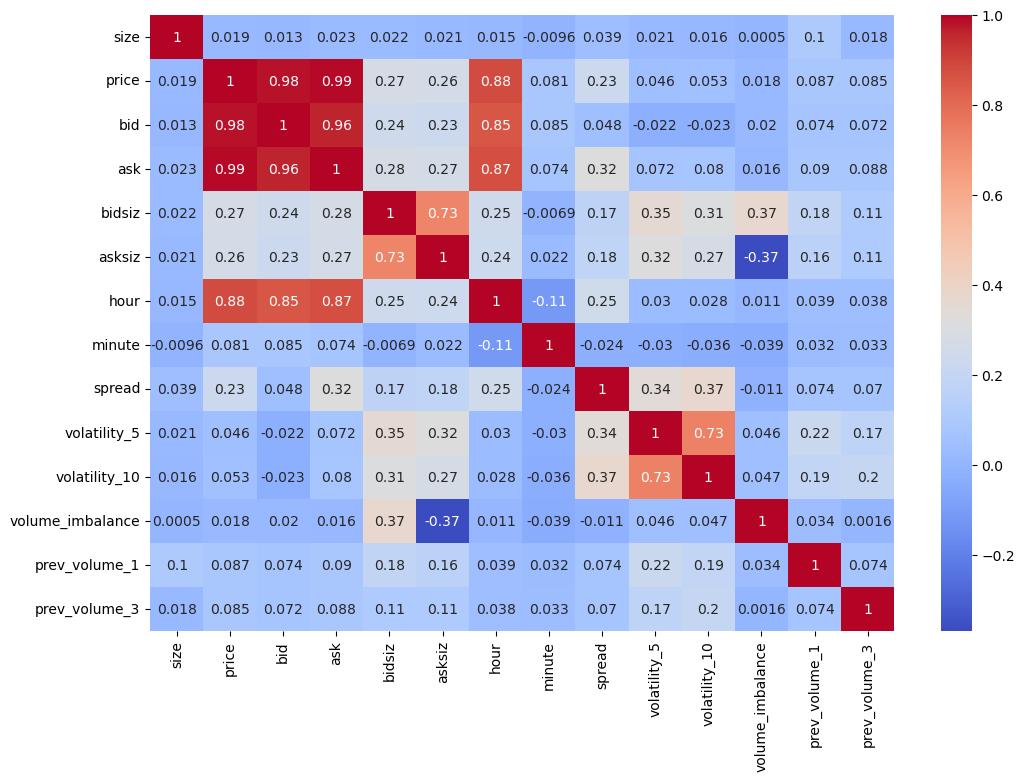

In [25]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named filtered_data
# filtered_data = pd.read_csv('path_to_your_file.csv')

# Cross-Validation using TimeSeriesSplit
X = filtered_data.drop('price',axis = 1)  # Assuming 'price' is the target variable
y = filtered_data['price']
tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()
mse_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

print("Average MSE across all folds:", np.mean(mse_scores))

# Correlation Check
corr_matrix = filtered_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score

# Defining the target variable and feature set
X = filtered_data.drop('price', axis=1)
y = filtered_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
logistic_model = LogisticRegression(max_iter=1000)
ridge_model = Ridge()
lasso_model = Lasso()
elastic_net_model = ElasticNet()

# Training the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

# Predicting using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluating the models
linear_mse = mean_squared_error(y_test, y_pred_linear)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
elastic_net_mse = mean_squared_error(y_test, y_pred_elastic_net)

linear_r2 = r2_score(y_test, y_pred_linear)
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)
elastic_net_r2 = r2_score(y_test, y_pred_elastic_net)

# Logistic Regression requires a binary target, so we need to modify the target variable
# Converting price changes to binary (increase: 1, decrease: 0)
y_binary = y.diff().fillna(0)
y_binary = np.where(y_binary > 0, 1, 0)

# Splitting the binary target into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Training and predicting with Logistic Regression
logistic_model.fit(X_train_bin, y_train_bin)
y_pred_logistic = logistic_model.predict(X_test_bin)

# Evaluating Logistic Regression
logistic_accuracy = accuracy_score(y_test_bin, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test_bin, y_pred_logistic)

{
    "Linear Regression": {"MSE": linear_mse, "R2": linear_r2},
    "Ridge Regression": {"MSE": ridge_mse, "R2": ridge_r2},
    "Lasso Regression": {"MSE": lasso_mse, "R2": lasso_r2},
    "Elastic Net": {"MSE": elastic_net_mse, "R2": elastic_net_r2},
    "Logistic Regression": {"Accuracy": logistic_accuracy, "ROC AUC": logistic_roc_auc}
}

{'Linear Regression': {'MSE': 0.00022066908393153398,
  'R2': 0.9951135088824894},
 'Ridge Regression': {'MSE': 0.00022366061220720456, 'R2': 0.9950472645491809},
 'Lasso Regression': {'MSE': 0.04515903737354743,
  'R2': -6.845980977665533e-07},
 'Elastic Net': {'MSE': 0.04515903737354743, 'R2': -6.845980977665533e-07},
 'Logistic Regression': {'Accuracy': 0.5578114981833725,
  'ROC AUC': 0.5551902662063899}}

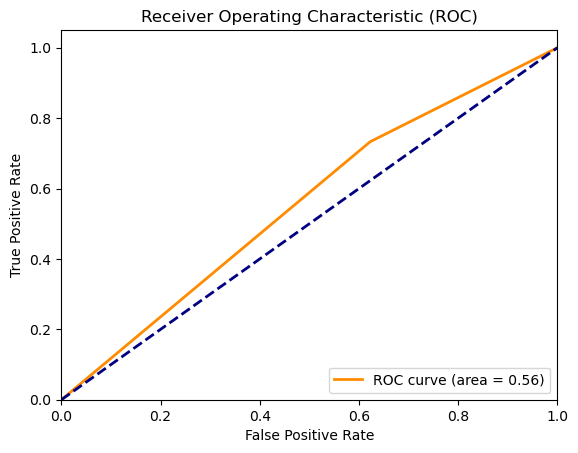

In [27]:
from sklearn.metrics import roc_curve, auc

# Calculating ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_logistic)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

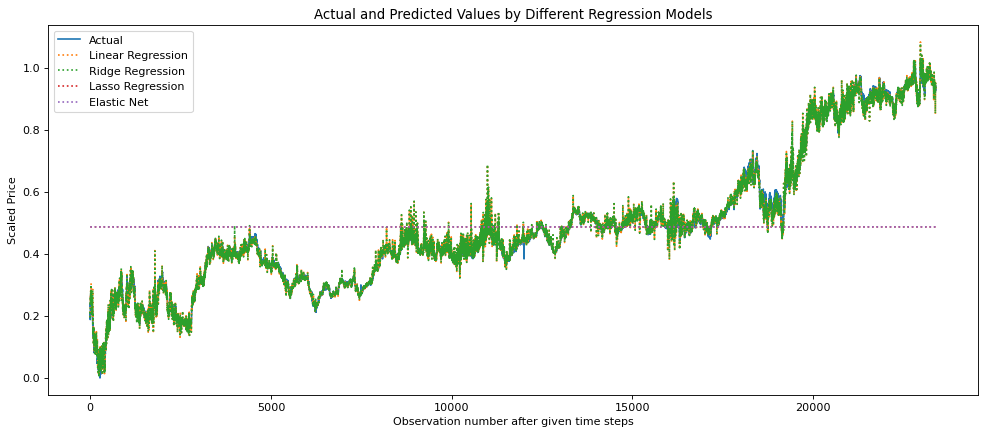

In [49]:
# Redoing the plot without logistic regression predictions
def plot_result(filtered_data, linear_pred, ridge_pred, lasso_pred, elastic_net_pred):
    actual = filtered_data['price']
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    
    # Plotting actual data
    plt.plot(range(rows), actual, label='Actual')
    
    # Plotting predictions
    plt.plot(range(rows), linear_pred, label='Linear Regression', linestyle='dotted')
    plt.plot(range(rows), ridge_pred, label='Ridge Regression', linestyle='dotted')
    plt.plot(range(rows), lasso_pred, label='Lasso Regression', linestyle='dotted')
    plt.plot(range(rows), elastic_net_pred, label='Elastic Net', linestyle='dotted')

    plt.legend()
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Scaled Price')
    plt.title('Actual and Predicted Values by Different Regression Models')

# Preparing data for plotting
y_pred_linear_full = linear_model.predict(X)
y_pred_ridge_full = ridge_model.predict(X)
y_pred_lasso_full = lasso_model.predict(X)
y_pred_elastic_net_full = elastic_net_model.predict(X)

plot_result(filtered_data, y_pred_linear_full, y_pred_ridge_full, y_pred_lasso_full, y_pred_elastic_net_full)

In [29]:
# Re-importing necessary libraries due to execution state reset
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models (excluding LightGBM and CATBoost)
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Training the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predicting with the models
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gbm = gbm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Computing MSE, RMSE, and R2 for each model
results = {
    "Decision Tree": {
        "MSE": mean_squared_error(y_test, y_pred_dt),
        "RMSE": sqrt(mean_squared_error(y_test, y_pred_dt)),
        "R2": r2_score(y_test, y_pred_dt)
    },
    "Random Forest": {
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "RMSE": sqrt(mean_squared_error(y_test, y_pred_rf)),
        "R2": r2_score(y_test, y_pred_rf)
    },
    "GBM": {
        "MSE": mean_squared_error(y_test, y_pred_gbm),
        "RMSE": sqrt(mean_squared_error(y_test, y_pred_gbm)),
        "R2": r2_score(y_test, y_pred_gbm)
    },
    "XGBoost": {
        "MSE": mean_squared_error(y_test, y_pred_xgb),
        "RMSE": sqrt(mean_squared_error(y_test, y_pred_xgb)),
        "R2": r2_score(y_test, y_pred_xgb)
    }
}

results

{'Decision Tree': {'MSE': 9.380529266041457e-05,
  'RMSE': 0.009685313245342898,
  'R2': 0.9979227777575638},
 'Random Forest': {'MSE': 5.202494504905492e-05,
  'RMSE': 0.00721283197149739,
  'R2': 0.9988479608138037},
 'GBM': {'MSE': 0.0001047030535018082,
  'RMSE': 0.010232451001681278,
  'R2': 0.9976814579922235},
 'XGBoost': {'MSE': 6.197538808563695e-05,
  'RMSE': 0.00787244486075558,
  'R2': 0.9986276184321375}}

In [30]:
# Since LightGBM is not available, proceeding with other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Re-initializing the models excluding LightGBM
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
]
model_names = ["Decision Tree", "Random Forest", "GBM", "XGBoost"]
accuracies = []
roc_aucs = []
roc_curves = []

for model, name in zip(models, model_names):
    model.fit(X_train_bin, y_train_bin)
    y_pred = model.predict(X_test_bin)
    y_pred_proba = model.predict_proba(X_test_bin)[:, 1]  # Probability of the positive class
    accuracies.append(accuracy_score(y_test_bin, y_pred))
    roc_aucs.append(roc_auc_score(y_test_bin, y_pred_proba))
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
    roc_curves.append((fpr, tpr, name))

# Results
accuracy_results = dict(zip(model_names, accuracies))
roc_auc_results = dict(zip(model_names, roc_aucs))
accuracy_results, roc_auc_results

({'Decision Tree': 0.5507587091258817,
  'Random Forest': 0.6031203248557384,
  'GBM': 0.6163710194486002,
  'XGBoost': 0.6069673007052789},
 {'Decision Tree': 0.5504907649207703,
  'Random Forest': 0.6556196284038764,
  'GBM': 0.6671923056539846,
  'XGBoost': 0.6444802423945599})

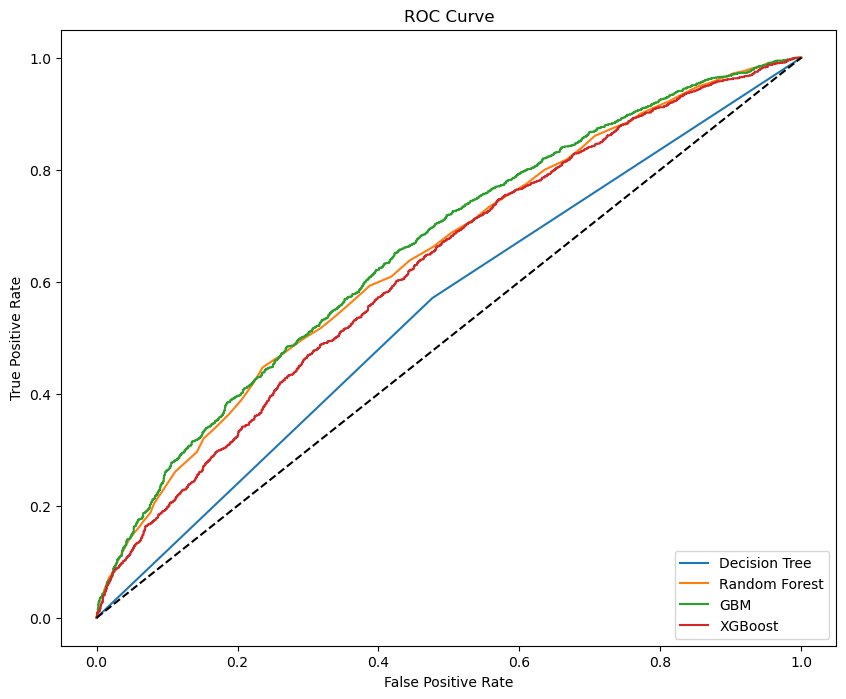

In [31]:
# Using a smaller subset of the data to avoid memory issues
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_bin, y_train_bin, test_size=0.2, random_state=42)

# Re-initializing the models
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gbm_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Training the models on the smaller subset
dt_classifier.fit(X_train_sub, y_train_sub)
rf_classifier.fit(X_train_sub, y_train_sub)
gbm_classifier.fit(X_train_sub, y_train_sub)
xgb_classifier.fit(X_train_sub, y_train_sub)

# Predicting probabilities for ROC curve
y_pred_proba_dt = dt_classifier.predict_proba(X_test_sub)[:, 1]
y_pred_proba_rf = rf_classifier.predict_proba(X_test_sub)[:, 1]
y_pred_proba_gbm = gbm_classifier.predict_proba(X_test_sub)[:, 1]
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_sub)[:, 1]

# Calculating ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test_sub, y_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test_sub, y_pred_proba_rf)
fpr_gbm, tpr_gbm, _ = roc_curve(y_test_sub, y_pred_proba_gbm)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_sub, y_pred_proba_xgb)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gbm, tpr_gbm, label='GBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Defining the target variable and feature set
X = filtered_data.drop('price', axis=1)
y = filtered_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the SVM models
linear_svm = SVR(kernel='linear')
non_linear_svm = SVR(kernel='rbf')  # RBF kernel for non-linear SVM

linear_svm.fit(X_train, y_train)
non_linear_svm.fit(X_train, y_train)

# Predicting using the models
y_pred_linear_svm = linear_svm.predict(X_test)
y_pred_non_linear_svm = non_linear_svm.predict(X_test)

# Evaluating the models
linear_svm_mse = mean_squared_error(y_test, y_pred_linear_svm)
non_linear_svm_mse = mean_squared_error(y_test, y_pred_non_linear_svm)

linear_svm_r2 = r2_score(y_test, y_pred_linear_svm)
non_linear_svm_r2 = r2_score(y_test, y_pred_non_linear_svm)

# Results
{
    "Linear SVM": {"MSE": linear_svm_mse, "R2": linear_svm_r2},
    "Non-linear SVM": {"MSE": non_linear_svm_mse, "R2": non_linear_svm_r2}
}

{'Linear SVM': {'MSE': 0.0018401140364034474, 'R2': 0.959252557114517},
 'Non-linear SVM': {'MSE': 0.0036507293209890575, 'R2': 0.9191583339105922}}

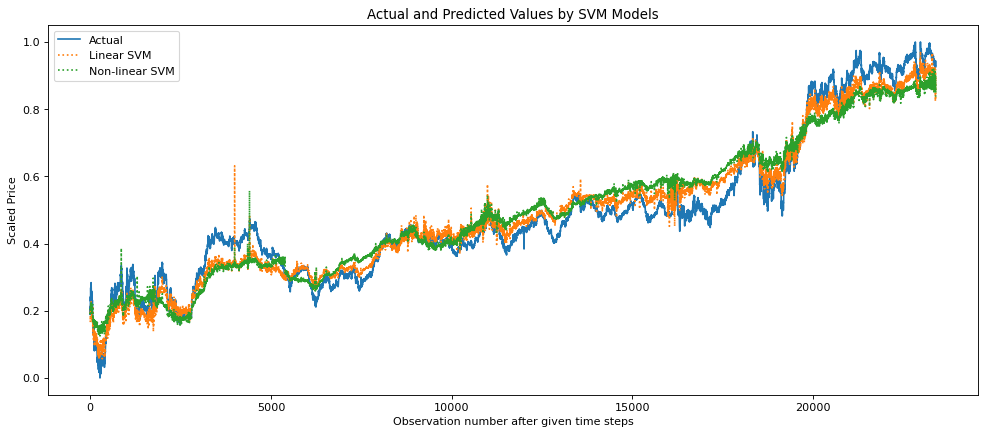

In [33]:
# Modified plot function to include SVM predictions and compare with filtered_data price
def plot_svm_results(filtered_data, linear_svm_pred, non_linear_svm_pred):
    actual = filtered_data['price']
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    
    # Plotting actual data
    plt.plot(range(rows), actual, label='Actual')
    
    # Plotting SVM predictions
    plt.plot(range(rows), linear_svm_pred, label='Linear SVM', linestyle='dotted')
    plt.plot(range(rows), non_linear_svm_pred, label='Non-linear SVM', linestyle='dotted')

    plt.legend()
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Scaled Price')
    plt.title('Actual and Predicted Values by SVM Models')

# Preparing data for plotting
y_pred_linear_svm_full = linear_svm.predict(X)
y_pred_non_linear_svm_full = non_linear_svm.predict(X)

plot_svm_results(filtered_data, y_pred_linear_svm_full, y_pred_non_linear_svm_full)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Initializing and training the k-Nearest Neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Using 5 neighbors for k-NN
knn_model.fit(X_train, y_train)

# Predicting using the k-NN model
y_pred_knn = knn_model.predict(X_test)

# Evaluating the k-NN model
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

# Preparing full dataset predictions for plotting
y_pred_knn_full = knn_model.predict(X)

# Results
knn_results = {
    "k-Nearest Neighbors": {"MSE": knn_mse, "R2": knn_r2}
}

knn_results

{'k-Nearest Neighbors': {'MSE': 0.0004167000302697603,
  'R2': 0.9907726041169802}}

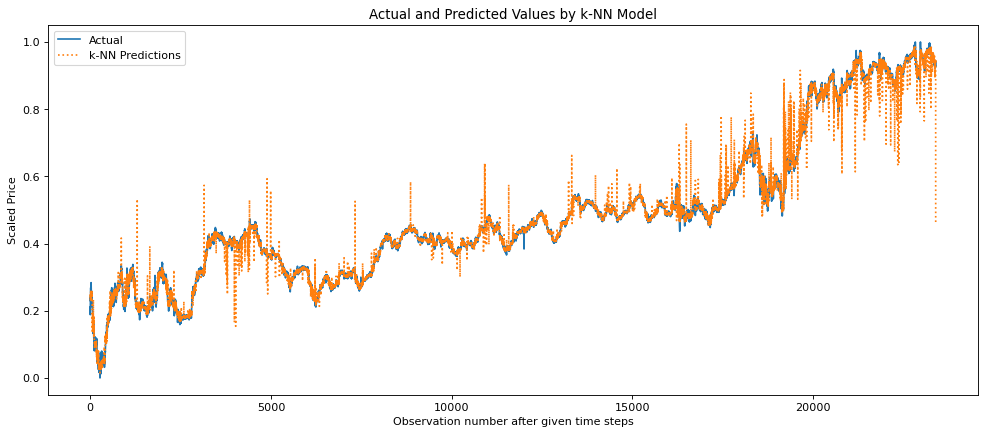

In [35]:
# Adjusting the k-NN prediction to handle the memory issue by predicting in smaller batches
def predict_in_batches(model, data, batch_size=1000):
    predictions = np.array([])
    for i in range(0, len(data), batch_size):
        batch_predictions = model.predict(data[i:i+batch_size])
        predictions = np.append(predictions, batch_predictions)
    return predictions

# Predicting in batches to avoid memory issues
y_pred_knn_full = predict_in_batches(knn_model, X)

# Plotting function for k-NN results
def plot_knn_results(filtered_data, knn_pred):
    actual = filtered_data['price']
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    
    # Plotting actual data
    plt.plot(range(rows), actual, label='Actual')
    
    # Plotting k-NN predictions
    plt.plot(range(rows), knn_pred, label='k-NN Predictions', linestyle='dotted')

    plt.legend()
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Scaled Price')
    plt.title('Actual and Predicted Values by k-NN Model')

plot_knn_results(filtered_data, y_pred_knn_full)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Transforming the continuous price data into a binary format for classification
# Classifying price changes as 'increase' (1) or 'decrease' (0)
y_class = (filtered_data['price'].diff() > 0).astype(int).shift(-1).dropna()
X_class = filtered_data.drop('price', axis=1).iloc[:-1]

# Splitting the dataset into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initializing and training Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_class, y_train_class)

# Predicting using the Gaussian Naive Bayes model
y_pred_gnb = gnb_model.predict(X_test_class)
y_pred_proba_gnb = gnb_model.predict_proba(X_test_class)[:, 1]  # Probabilities for ROC

# Evaluating the Gaussian Naive Bayes model
gnb_accuracy = accuracy_score(y_test_class, y_pred_gnb)
gnb_roc_auc = roc_auc_score(y_test_class, y_pred_proba_gnb)

# Results
gnb_results = {
    "Gaussian Naive Bayes": {
        "Accuracy": gnb_accuracy,
        "ROC AUC": gnb_roc_auc
    }
}

gnb_results

{'Gaussian Naive Bayes': {'Accuracy': 0.5133575550331267,
  'ROC AUC': 0.530550260069893}}

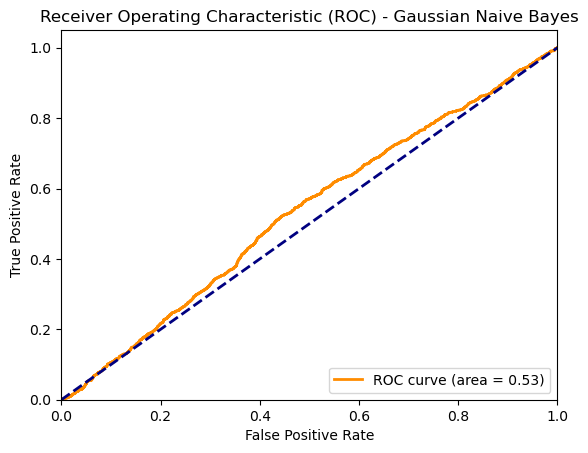

In [37]:
# Plotting ROC curve for Gaussian Naive Bayes model
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_class, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

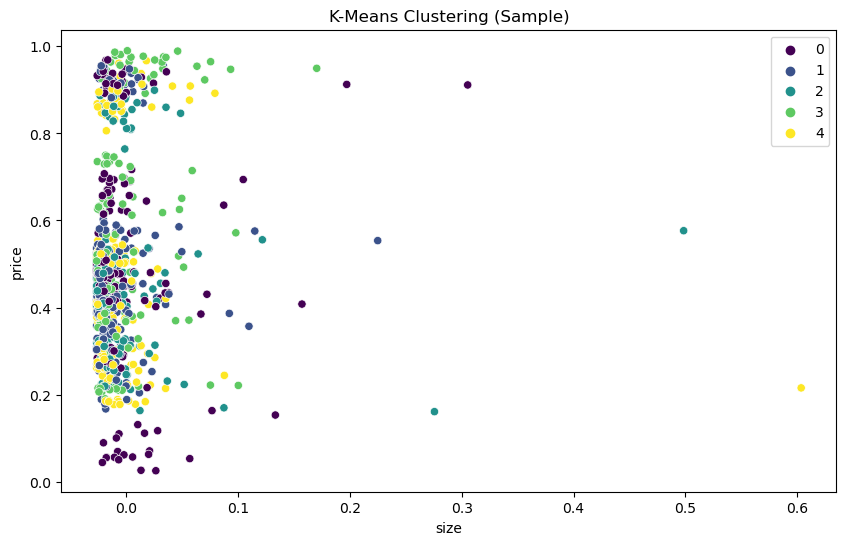

{'K-Means': 0.4652792052152732,
 'Hierarchical': 0.43822640003854585,
 'DBSCAN': -0.7126088133329213,
 'Mean Shift': 0.2560513955422951,
 'Gaussian Mixture Models': -0.09085403116271672}

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of the data for visualization purposes
sample_data = filtered_data.sample(n=1000, random_state=42)

# Applying various clustering algorithms
kmeans = KMeans(n_clusters=5, random_state=42).fit(sample_data)
hierarchical = AgglomerativeClustering(n_clusters=5).fit(sample_data)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(sample_data)
mean_shift = MeanShift(bandwidth=2).fit(sample_data)
gmm = GaussianMixture(n_components=5, random_state=42).fit(sample_data)

# Predicting clusters
kmeans_labels = kmeans.predict(sample_data)
hierarchical_labels = hierarchical.labels_
dbscan_labels = dbscan.labels_
mean_shift_labels = mean_shift.labels_
gmm_labels = gmm.predict(sample_data)

# Calculating silhouette scores
kmeans_silhouette = silhouette_score(sample_data, kmeans_labels)
hierarchical_silhouette = silhouette_score(sample_data, hierarchical_labels)
dbscan_silhouette = silhouette_score(sample_data, dbscan_labels)
mean_shift_silhouette = silhouette_score(sample_data, mean_shift_labels)
gmm_silhouette = silhouette_score(sample_data, gmm_labels)

# Results
clustering_results = {
    "K-Means": kmeans_silhouette,
    "Hierarchical": hierarchical_silhouette,
    "DBSCAN": dbscan_silhouette,
    "Mean Shift": mean_shift_silhouette,
    "Gaussian Mixture Models": gmm_silhouette
}

# Plotting the results of K-Means for visualization (as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sample_data.iloc[:, 0], y=sample_data.iloc[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("K-Means Clustering (Sample)")
plt.show()

clustering_results

In [39]:
data_1102  = pd.read_csv('AAPL1102.csv')
data_1127  = pd.read_csv('AAPL1127.csv')

In [40]:
columns_to_keep_trade_price = ['date', 'time_m', 'size', 'price']
data_1102 = data_1102[columns_to_keep_trade_price]
data_1102['datetime'] = pd.to_datetime(data_1102['date'].astype(str) + ' ' + data_1102['time_m'].astype(str))
data_1102 = data_1102.drop(columns=['date', 'time_m'])
data_1102.set_index('datetime', inplace=True)

data_1127 = data_1127[columns_to_keep_trade_price]
data_1127['datetime'] = pd.to_datetime(data_1127['date'].astype(str) + ' ' + data_1127['time_m'].astype(str))
data_1127 = data_1127.drop(columns=['date', 'time_m'])
data_1127.set_index('datetime', inplace=True)

In [41]:
data_1102

,size,price
datetime,,
2023-11-02 04:00:00.008409,5,174.70
2023-11-02 04:00:00.008411,1,174.70
2023-11-02 04:00:00.009755,2,174.75
2023-11-02 04:00:00.010918,2,174.66
2023-11-02 04:00:00.031822,103,174.99
...,...,...
2023-11-02 19:59:58.923059,59,171.53
2023-11-02 19:59:58.999279,12,171.54
2023-11-02 19:59:58.999403,13,171.53


In [42]:
data_1127

,size,price
datetime,,
2023-11-27 04:00:00.007146,1,189.32
2023-11-27 04:00:00.008013,4,189.85
2023-11-27 04:00:00.009273,12,189.85
2023-11-27 04:00:00.009639,1,189.85
2023-11-27 04:00:00.009806,5,189.85
...,...,...
2023-11-27 19:59:44.944888,15,190.15
2023-11-27 19:59:44.944890,100,190.15
2023-11-27 19:59:46.035316,1,190.11


In [43]:
time_intervals_trade_price_1102 = data_1102.index.to_series().diff().dropna().unique()
time_intervals_trade_price_1127 = data_1127.index.to_series().diff().dropna().unique()

# Displaying the unique time intervals for both datasets
time_intervals_trade_price_1102, time_intervals_trade_price_1127

(array([     2000,   1344000,   1163000, ..., 299146000, 315251000,
        448874000], dtype='timedelta64[ns]'),
 array([    867000,    1260000,     366000, ..., 7781963000, 1090426000,
        5840579000], dtype='timedelta64[ns]'))

In [44]:
# Adjusting the aggregation rules for each dataset separately

# Aggregation rules for trade price data
aggregation_rules_trade_price = {
    'size': 'sum',  # Sum of size
    'price': 'mean' # Average price
}

# Aggregation rules for bid-ask data
aggregation_rules_bid_ask = {
    'bid': 'mean',    # Average bid
    'ask': 'mean',    # Average ask
    'bidsiz': 'sum',  # Sum of bidsiz
    'asksiz': 'sum'   # Sum of asksiz
}

# Applying the aggregation rules during resampling for each dataset
data_1102 = data_1102.resample('1S').agg(aggregation_rules_trade_price).ffill()
data_1127 = data_1127.resample('1S').agg(aggregation_rules_trade_price).ffill()

data_1102

,size,price
datetime,,
2023-11-02 04:00:00,185,174.743077
2023-11-02 04:00:01,75,174.800000
2023-11-02 04:00:02,80,174.715000
2023-11-02 04:00:03,1,174.800000
2023-11-02 04:00:04,2,174.800000
...,...,...
2023-11-02 19:59:55,20,171.550000
2023-11-02 19:59:56,1215,171.554000
2023-11-02 19:59:57,75,171.540000


In [45]:
data_1127

,size,price
datetime,,
2023-11-27 04:00:00,473,189.507826
2023-11-27 04:00:01,51,189.193333
2023-11-27 04:00:02,3,189.185000
2023-11-27 04:00:03,3,189.190000
2023-11-27 04:00:04,150,189.184000
...,...,...
2023-11-27 19:59:47,0,190.110000
2023-11-27 19:59:48,0,190.110000
2023-11-27 19:59:49,0,190.110000


In [46]:
data_1102 = data_1102.between_time('09:30', '16:00')

data_1102.to_csv('data_1102.csv')
# Display the first few rows of the filtered dataframe
data_1102

,size,price
datetime,,
2023-11-02 09:30:00,1254253,175.567147
2023-11-02 09:30:01,51713,175.627969
2023-11-02 09:30:02,22363,175.513992
2023-11-02 09:30:03,39579,175.503370
2023-11-02 09:30:04,15551,175.515000
...,...,...
2023-11-02 15:59:56,7602,177.698396
2023-11-02 15:59:57,37550,177.665352
2023-11-02 15:59:58,12225,177.638834


In [47]:
data_1127 = data_1127.between_time('09:30', '16:00')

data_1127.to_csv('data_1127.csv')
# Display the first few rows of the filtered dataframe
data_1127

,size,price
datetime,,
2023-11-27 09:30:00,997199,189.945409
2023-11-27 09:30:01,27107,189.966947
2023-11-27 09:30:02,14408,189.949814
2023-11-27 09:30:03,44492,189.922559
2023-11-27 09:30:04,28799,189.908452
...,...,...
2023-11-27 15:59:56,11037,189.801310
2023-11-27 15:59:57,35052,189.814728
2023-11-27 15:59:58,24766,189.793232
